# Fuzzy Run Challenge


In [27]:
import pandas as pd
import seaborn as sns
from scipy.integrate import simps
from numpy import trapz

## Load data

In [28]:
dfMatt = pd.read_csv("../data/matt.csv")
dfMisha = pd.read_csv("../data/misha.csv")
dfTom = pd.read_csv("../data/tom.csv")

## Plot acceleration

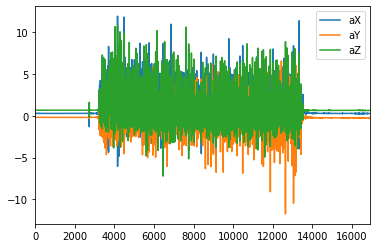

In [29]:
dfMisha.loc[:, ["aX", "aY", "aZ"]].plot()

## Plot shor segment

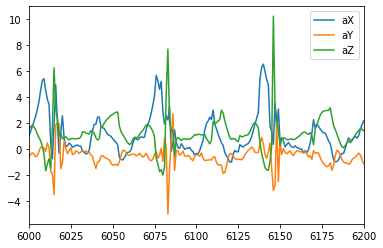

In [30]:
dfMisha.loc[6000:6200, ["aX", "aY", "aZ"]].plot()

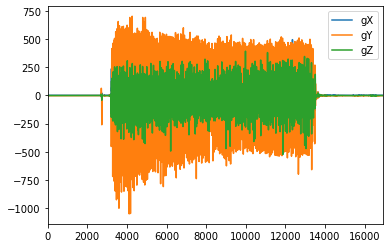

In [31]:
dfMisha.loc[:, ["gX", "gY", "gZ"]].plot()

In [32]:
dfMisha.head()

,time,aX,aY,aZ,gX,gY,gZ
0,0,0.298828,-0.180176,0.678223,1.220703,-2.807617,-1.586914
1,10,0.297729,-0.178711,0.678955,1.220703,-2.807617,-1.525879
2,20,0.294434,-0.184204,0.676392,1.342773,-2.624512,-1.586914
3,40,0.296265,-0.180176,0.676392,1.342773,-2.563477,-1.586914
4,50,0.296265,-0.182373,0.680420,1.281738,-2.685547,-1.525879


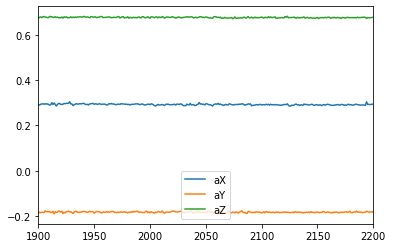

In [33]:
dfMisha.loc[1900:2200, ["aX", "aY", "aZ"]].plot()

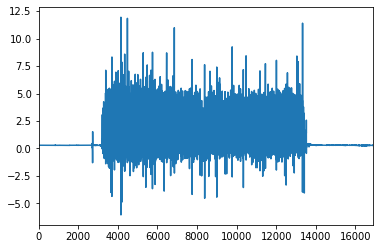

In [34]:
dfMisha['aX'].plot()

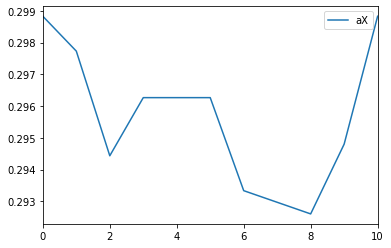

In [35]:
dfMisha.loc[0:10, ["aX"]].plot()

In [36]:
dfMisha['time'] = dfMisha['time'].apply(lambda x: x*0.001)

In [37]:
dfMishaX = dfMisha.drop(['aY', 'aZ', 'gX', 'gY', 'gZ'], axis=1)

In [38]:
velocity_area = trapz(dfMattaX, dx=0.001)
velocity_area

array([0.00038232, 0.00039904, 0.00039574, ..., 0.07229613, 0.07230016,
       0.07230711])

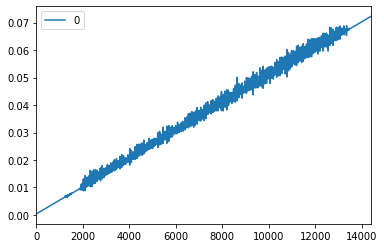

In [39]:
df_velocity = pd.DataFrame(data=velocity_area)
df_velocity.plot()

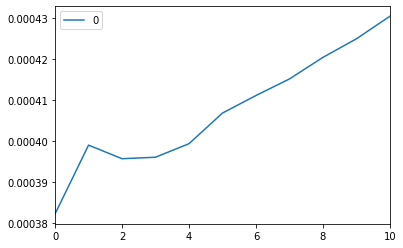

In [40]:
df_velocity.loc[0:10, [0]].plot()

In [41]:
time = dfMishaX["time"]
df_velocity = df_velocity.join(time)

In [42]:
df_velocity.head()

,0,time
0,0.000382,0.00
1,0.000399,0.01
2,0.000396,0.02
3,0.000396,0.04
4,0.000399,0.05


In [43]:
distance_area = trapz(df_velocity, dx=5)
distance_area

array([9.55810547e-04, 2.59976074e-02, 5.09893555e-02, ...,
       4.01870740e+02, 4.01895750e+02, 4.01920768e+02])

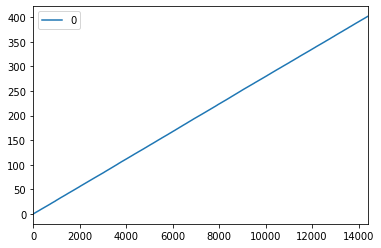

In [44]:
df_distance = pd.DataFrame(data=distance_area)
df_distance.plot()

In [45]:
area_last = trapz(df_velocity[0], dx=0.001)
area_last

0.5265298949804688

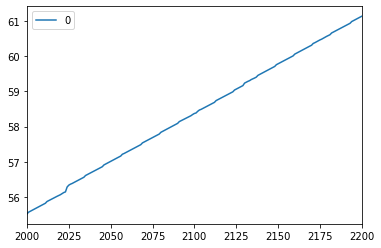

In [46]:
df_distance.loc[2000:2200, [0]].plot()

In [47]:
df_distance.head()

,0
0,0.000956
1,0.025998
2,0.050989
3,0.100990
4,0.125998


In [48]:
dfMishaFinal = df_distance
dfMishaFinal[1] = df_velocity[0]
dfMishaFinal[2] = dfMatt['aX']
dfMishaFinal = dfMishaFinal.rename(columns={0: "distance", 1: "velocity", 2:"acceleration"})

In [49]:
dfMishaFinal.head()

,distance,velocity,acceleration
0,0.000956,0.000382,0.764648
1,0.025998,0.000399,0.788086
2,0.050989,0.000396,0.771484
3,0.100990,0.000396,0.762207
4,0.125998,0.000399,0.758789


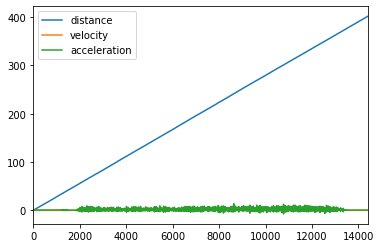

In [50]:
dfMishaFinal.plot()

In [51]:
dfMishaFinal.head()

,distance,velocity,acceleration
0,0.000956,0.000382,0.764648
1,0.025998,0.000399,0.788086
2,0.050989,0.000396,0.771484
3,0.100990,0.000396,0.762207
4,0.125998,0.000399,0.758789


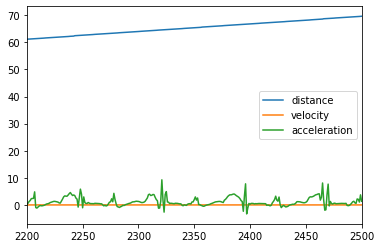

In [52]:
dfMishaFinal.loc[2200:2500].plot()

In [67]:
 X_distance = dfMishaFinal.iloc[-1] ["distance"]
    
X_distance

401.9207677734375

In [69]:
dfMisha

,time,aX,aY,aZ,gX,gY,gZ
0,0.000,0.298828,-0.180176,0.678223,1.220703,-2.807617,-1.586914
1,0.010,0.297729,-0.178711,0.678955,1.220703,-2.807617,-1.525879
2,0.020,0.294434,-0.184204,0.676392,1.342773,-2.624512,-1.586914
3,0.040,0.296265,-0.180176,0.676392,1.342773,-2.563477,-1.586914
4,0.050,0.296265,-0.182373,0.680420,1.281738,-2.685547,-1.525879
...,...,...,...,...,...,...,...
16903,194.926,0.281250,-0.255615,0.650757,1.525879,-2.929688,-1.770020
16904,194.946,0.287842,-0.254883,0.648193,1.525879,-2.868652,-1.770020
16905,194.956,0.279419,-0.252319,0.645264,1.464844,-2.807617,-1.586914
16906,194.966,0.281982,-0.253418,0.648560,1.342773,-2.746582,-1.525879


In [75]:
dfMishaY = dfMisha.drop(['aX', 'aZ', 'gX', 'gY', 'gZ'], axis=1)

In [76]:
dfMishaY

,time,aY
0,0.000,-0.180176
1,0.010,-0.178711
2,0.020,-0.184204
3,0.040,-0.180176
4,0.050,-0.182373
...,...,...
16903,194.926,-0.255615
16904,194.946,-0.254883
16905,194.956,-0.252319
16906,194.966,-0.253418


In [77]:
velocity_area = trapz(dfMishaY, dx=0.001)
velocity_area

array([-9.00878906e-05, -8.43554687e-05, -8.21020508e-05, ...,
        9.73518403e-02,  9.73562910e-02,  9.73603755e-02])

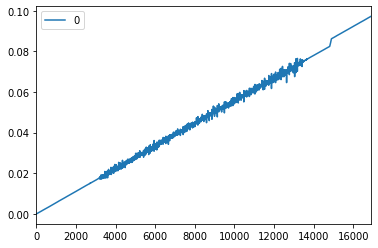

In [78]:
df_velocity = pd.DataFrame(data=velocity_area)
df_velocity.plot()


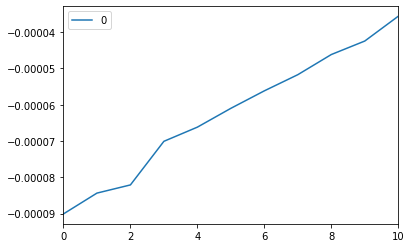

In [79]:
df_velocity.loc[0:10, [0]].plot()

In [80]:
time = dfMishaY["time"]
df_velocity = df_velocity.join(time)

In [81]:
df_velocity

,0,time
0,-0.000090,0.000
1,-0.000084,0.010
2,-0.000082,0.020
3,-0.000070,0.040
4,-0.000066,0.050
...,...,...
16903,0.097335,194.926
16904,0.097346,194.946
16905,0.097352,194.956
16906,0.097356,194.966


In [82]:
distance_area = trapz(df_velocity, dx=5)
distance_area

array([-2.25219727e-04,  2.47891113e-02,  4.97947449e-02, ...,
        4.87633380e+02,  4.87658391e+02,  4.87683401e+02])

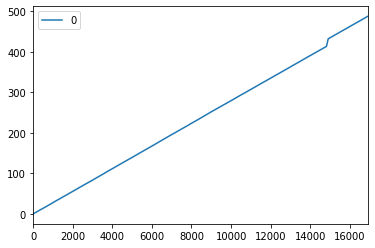

In [83]:
df_distance = pd.DataFrame(data=distance_area)
df_distance.plot()

In [84]:
area_last = trapz(df_velocity[0], dx=0.001)
area_last

0.8013517225710449

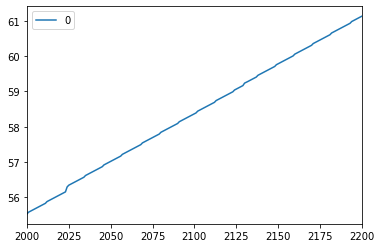

In [85]:
df_distance.loc[2000:2200, [0]].plot()

In [86]:
df_distance.head()

,0
0,-0.000225
1,0.024789
2,0.049795
3,0.099825
4,0.124835


In [87]:
dfMishaFinal = df_distance
dfMishaFinal[1] = df_velocity[0]
dfMishaFinal[2] = dfMatt['aY']
dfMishaFinal = dfMishaFinal.rename(columns={0: "distance", 1: "velocity", 2:"acceleration"})

In [88]:
dfMishaFinal.head()

,distance,velocity,acceleration
0,-0.000225,-0.000090,0.042969
1,0.024789,-0.000084,0.041504
2,0.049795,-0.000082,0.028320
3,0.099825,-0.000070,0.042480
4,0.124835,-0.000066,0.040527


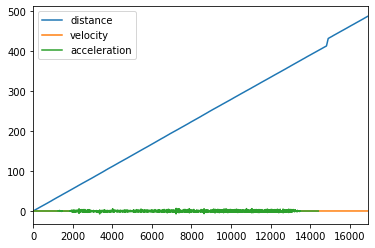

In [89]:
dfMishaFinal.plot()

In [90]:
Y_distance = dfMishaFinal.iloc[-1] ["distance"]
    
Y_distance

487.6834009387207

In [91]:
dfMishaZ = dfMisha.drop(['aX', 'aY', 'gX', 'gY', 'gZ'], axis=1)

In [92]:
dfMishaZ

,time,aZ
0,0.000,0.678223
1,0.010,0.678955
2,0.020,0.676392
3,0.040,0.676392
4,0.050,0.680420
...,...,...
16903,194.926,0.650757
16904,194.946,0.648193
16905,194.956,0.645264
16906,194.966,0.648560


In [97]:
velocity_area = trapz(dfMishaZ, dx=0.001)
velocity_area

array([0.00033911, 0.00034448, 0.0003482 , ..., 0.09780063, 0.09780728,
       0.09781173])

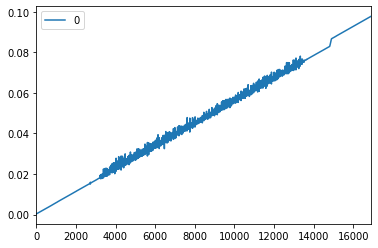

In [98]:
df_velocity = pd.DataFrame(data=velocity_area)
df_velocity.plot()


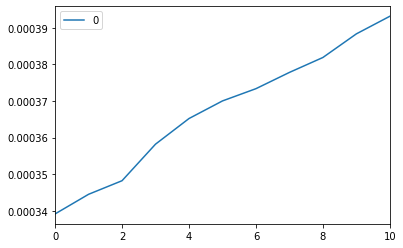

In [99]:
df_velocity.loc[0:10, [0]].plot()

In [100]:
time = dfMishaZ["time"]
df_velocity = df_velocity.join(time)

In [101]:
df_velocity

,0,time
0,0.000339,0.000
1,0.000344,0.010
2,0.000348,0.020
3,0.000358,0.040
4,0.000365,0.050
...,...,...
16903,0.097788,194.926
16904,0.097797,194.946
16905,0.097801,194.956
16906,0.097807,194.966


In [102]:
distance_area = trapz(df_velocity, dx=5)
distance_area

array([8.47778320e-04, 2.58611938e-02, 5.08704895e-02, ...,
       4.87634502e+02, 4.87659518e+02, 4.87684529e+02])

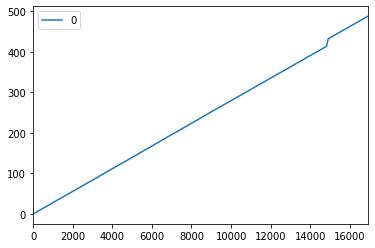

In [103]:
df_distance = pd.DataFrame(data=distance_area)
df_distance.plot()

In [104]:
area_last = trapz(df_velocity[0], dx=0.001)
area_last

0.811949141913086

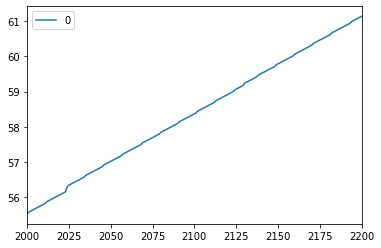

In [105]:
df_distance.loc[2000:2200, [0]].plot()

In [106]:
df_distance.head()

,0
0,0.000848
1,0.025861
2,0.050870
3,0.100895
4,0.125913


In [107]:
dfMishaFinal = df_distance
dfMishaFinal[1] = df_velocity[0]
dfMishaFinal[2] = dfMatt['aZ']
dfMishaFinal = dfMishaFinal.rename(columns={0: "distance", 1: "velocity", 2:"acceleration"})

In [108]:
dfMishaFinal.head()

,distance,velocity,acceleration
0,0.000848,0.000339,0.650879
1,0.025861,0.000344,0.664062
2,0.050870,0.000348,0.644531
3,0.100895,0.000358,0.646973
4,0.125913,0.000365,0.651855


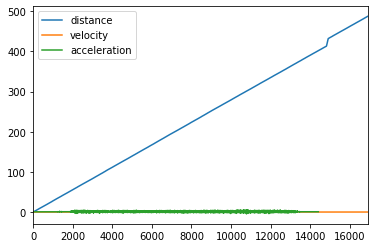

In [109]:
dfMishaFinal.plot()

In [110]:
Z_distance = dfMishaFinal.iloc[-1] ["distance"]
    
Z_distance

487.68452932617186